<a href="https://colab.research.google.com/github/Ambrgna/CS-5530-Assignment-1/blob/main/students_performance/src/students_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read Raw Data (Ingestion Stage)

In [ ]:
url = 'https://raw.githubusercontent.com/Ambrgna/CS-5530-Assignment-1/refs/heads/main/students_performance/data_raw/raw_students_performance_data.csv'
df = pd.read_csv(url)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Preprocessing Stage

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=np.number)

for col in non_numeric_cols.columns:
    print(f"{col}:")
    for val in non_numeric_cols[col].unique():
        print(f"  - {val}")
    print()

gender:
  - female
  - male

race/ethnicity:
  - group B
  - group C
  - group A
  - group D
  - group E

parental level of education:
  - bachelor's degree
  - some college
  - master's degree
  - associate's degree
  - high school
  - some high school

lunch:
  - standard
  - free/reduced

test preparation course:
  - none
  - completed



In [ ]:
df_clean = pd.get_dummies(
    df.assign(
      gender=df["gender"].map({"male": 1, "female": 0}).astype('int8'),
      lunch=df["lunch"].map({"standard": 1, "free/reduced": 0}).astype('int8'),
      test_preparation_course=df["test preparation course"].map({"completed": 1, "none": 0}).astype('int8')
    ),
    columns=["parental level of education", "race/ethnicity"],
    prefix=["parental level of education", "race/ethnicity"],
    dtype='int8'
    )
df_clean.to_csv("clean_students_performance_data.csv", index=False)
df_clean


,gender,lunch,test preparation course,math score,reading score,writing score,test_preparation_course,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,1,none,72,72,74,0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,completed,69,90,88,1,0,0,0,0,1,0,0,0,1,0,0
2,0,1,none,90,95,93,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,none,47,57,44,0,1,0,0,0,0,0,1,0,0,0,0
4,1,1,none,76,78,75,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,completed,88,99,95,1,0,0,0,1,0,0,0,0,0,0,1
996,1,0,none,62,55,55,0,0,0,1,0,0,0,0,0,1,0,0
997,0,0,completed,59,71,65,1,0,0,1,0,0,0,0,0,1,0,0
998,0,1,completed,68,78,77,1,0,0,0,0,1,0,0,0,0,1,0


Gender boxplots (math vs reading)

Question: Are there gender differences in math vs reading?


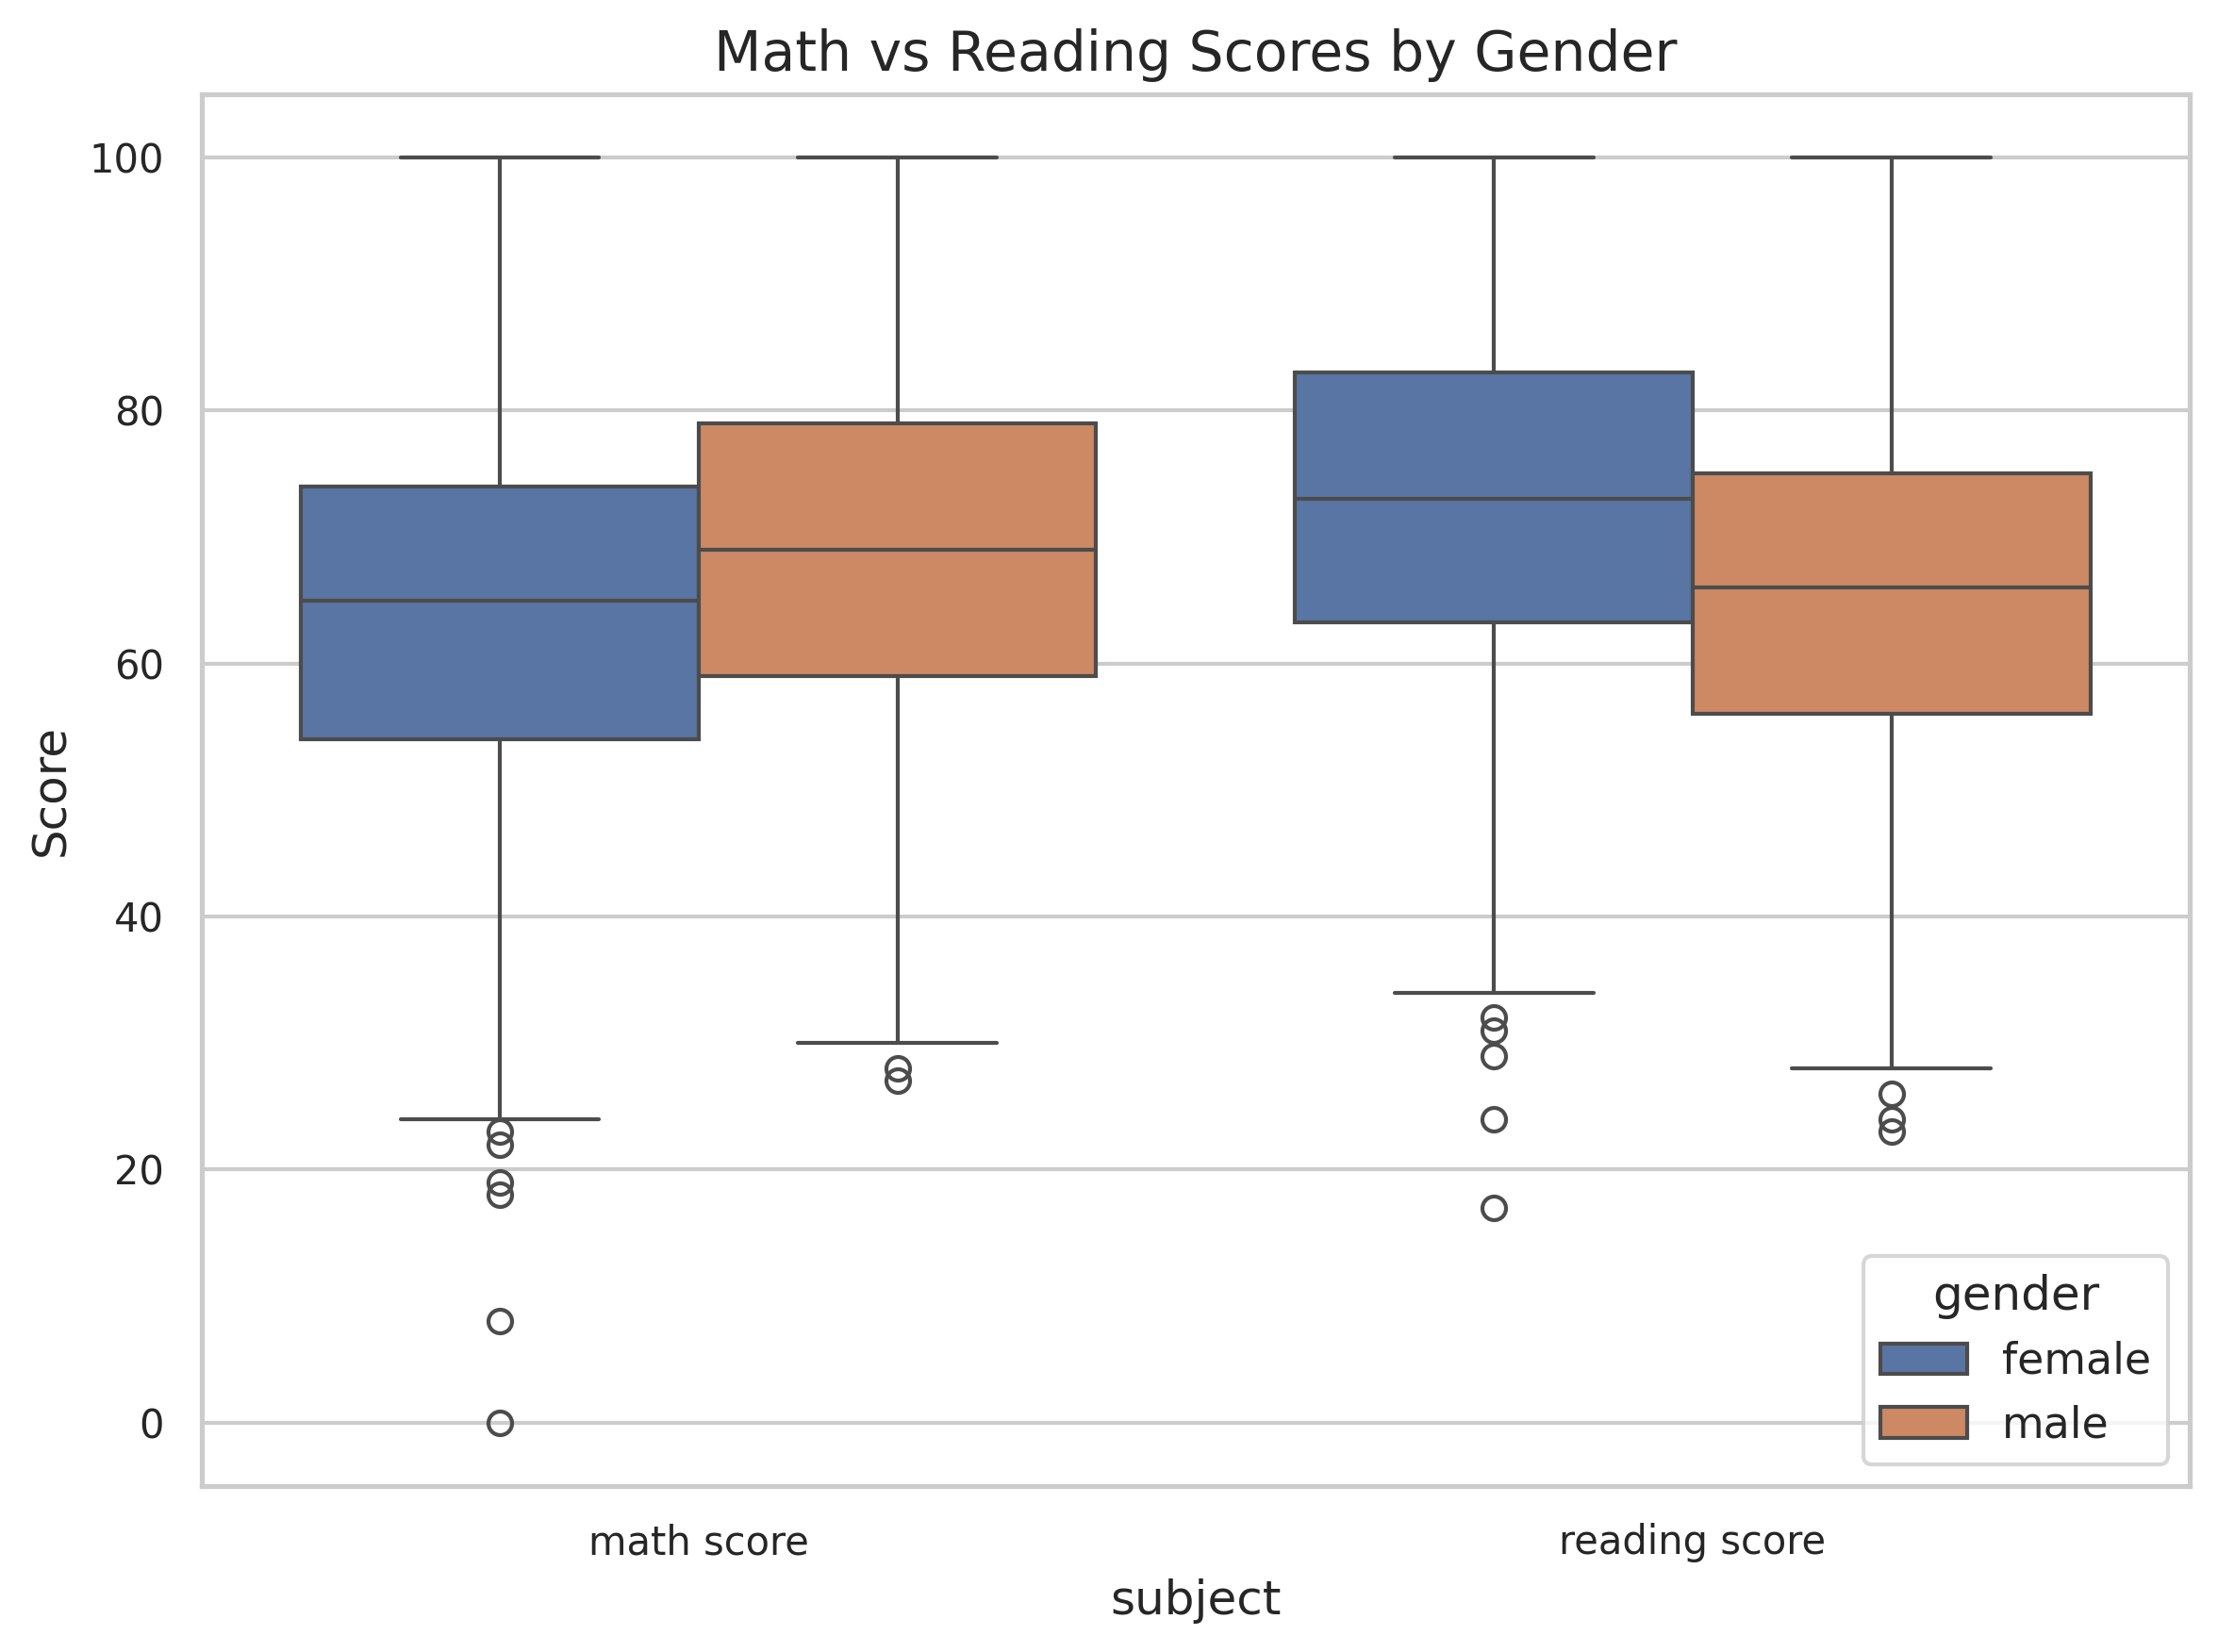

In [ ]:
df_melted = df_clean.melt(id_vars="gender", value_vars=["math score", "reading score"],
                    var_name="subject", value_name="score")


df_melted["gender"] = df_melted["gender"].map({1: "male", 0: "female"})

plt.figure(figsize=(8, 6), dpi=300)

sns.boxplot(x="subject", y="score", hue="gender", data=df_melted)

plt.title("Math vs Reading Scores by Gender", fontsize=14)
plt.ylabel("Score", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.show()



5–8 sentence interpretation to reports

Based on the graph, we can see clear gender differences in Math and Reading scores. Overall, students performed better in Reading than in Math. Males tended to score higher in Math, while females generally scored higher in Reading. Additionally, male students had more outliers on the lower end of the scores compared to females, indicating greater variability. This analysis suggests that gender may be associated with differences in performance between these two subjects.

Test prep impact on math

Question: Do students who completed test prep score higher in math

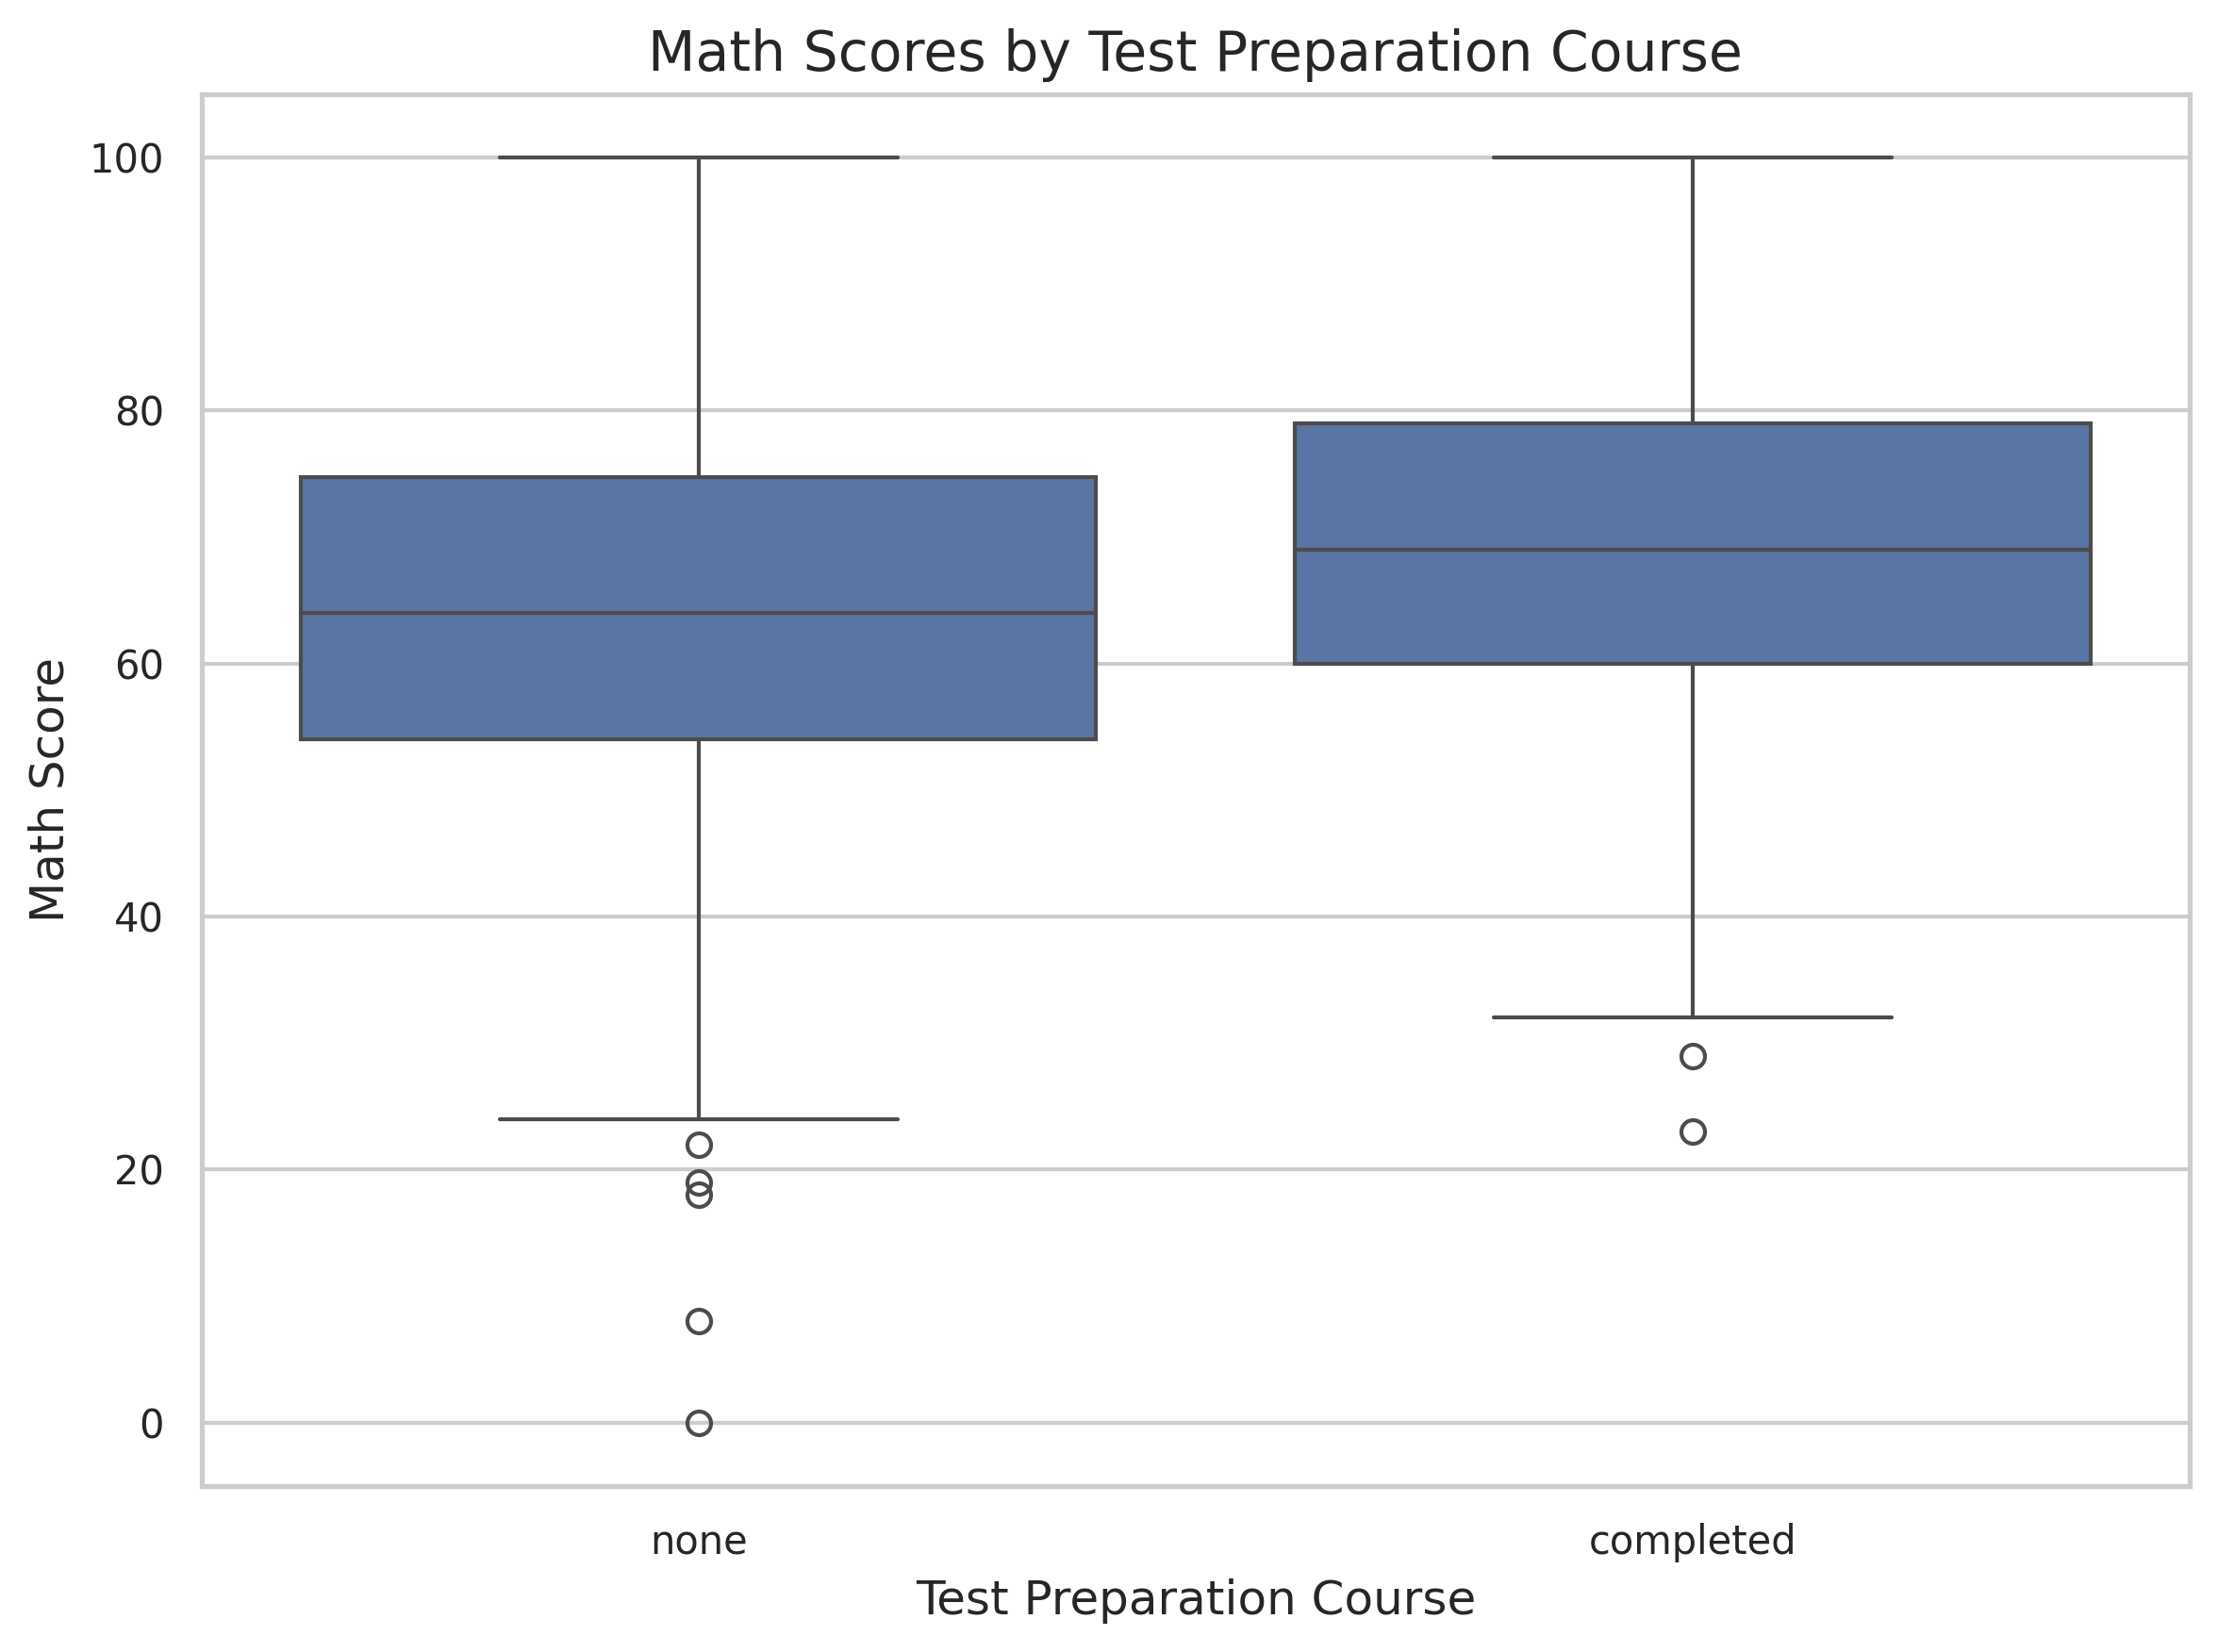

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)

sns.boxplot(
    x=df_clean["test_preparation_course"].map({1: "completed", 0: "none"}),  # map on the fly
    y=df_clean["math score"]
)

plt.title("Math Scores by Test Preparation Course", fontsize=14)
plt.xlabel("Test Preparation Course", fontsize=12)
plt.ylabel("Math Score", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


5–8 sentence interpretation to reports

Based on the graph, we can see clear differences between students who completed the test preparation course and those who did not. Students who completed the course generally performed slightly better than those who did not. Additionally, the group of students who did not complete the course shows more outliers, indicating a wider spread of scores. In contrast, the completed group has less variability, with scores more tightly clustered around the median. This suggests that completing the test preparation course may be associated with more consistent and slightly higher performance.

Lunch type and average performance

Question: Does lunch type (standard vs free/reduced) relate to outcomes?

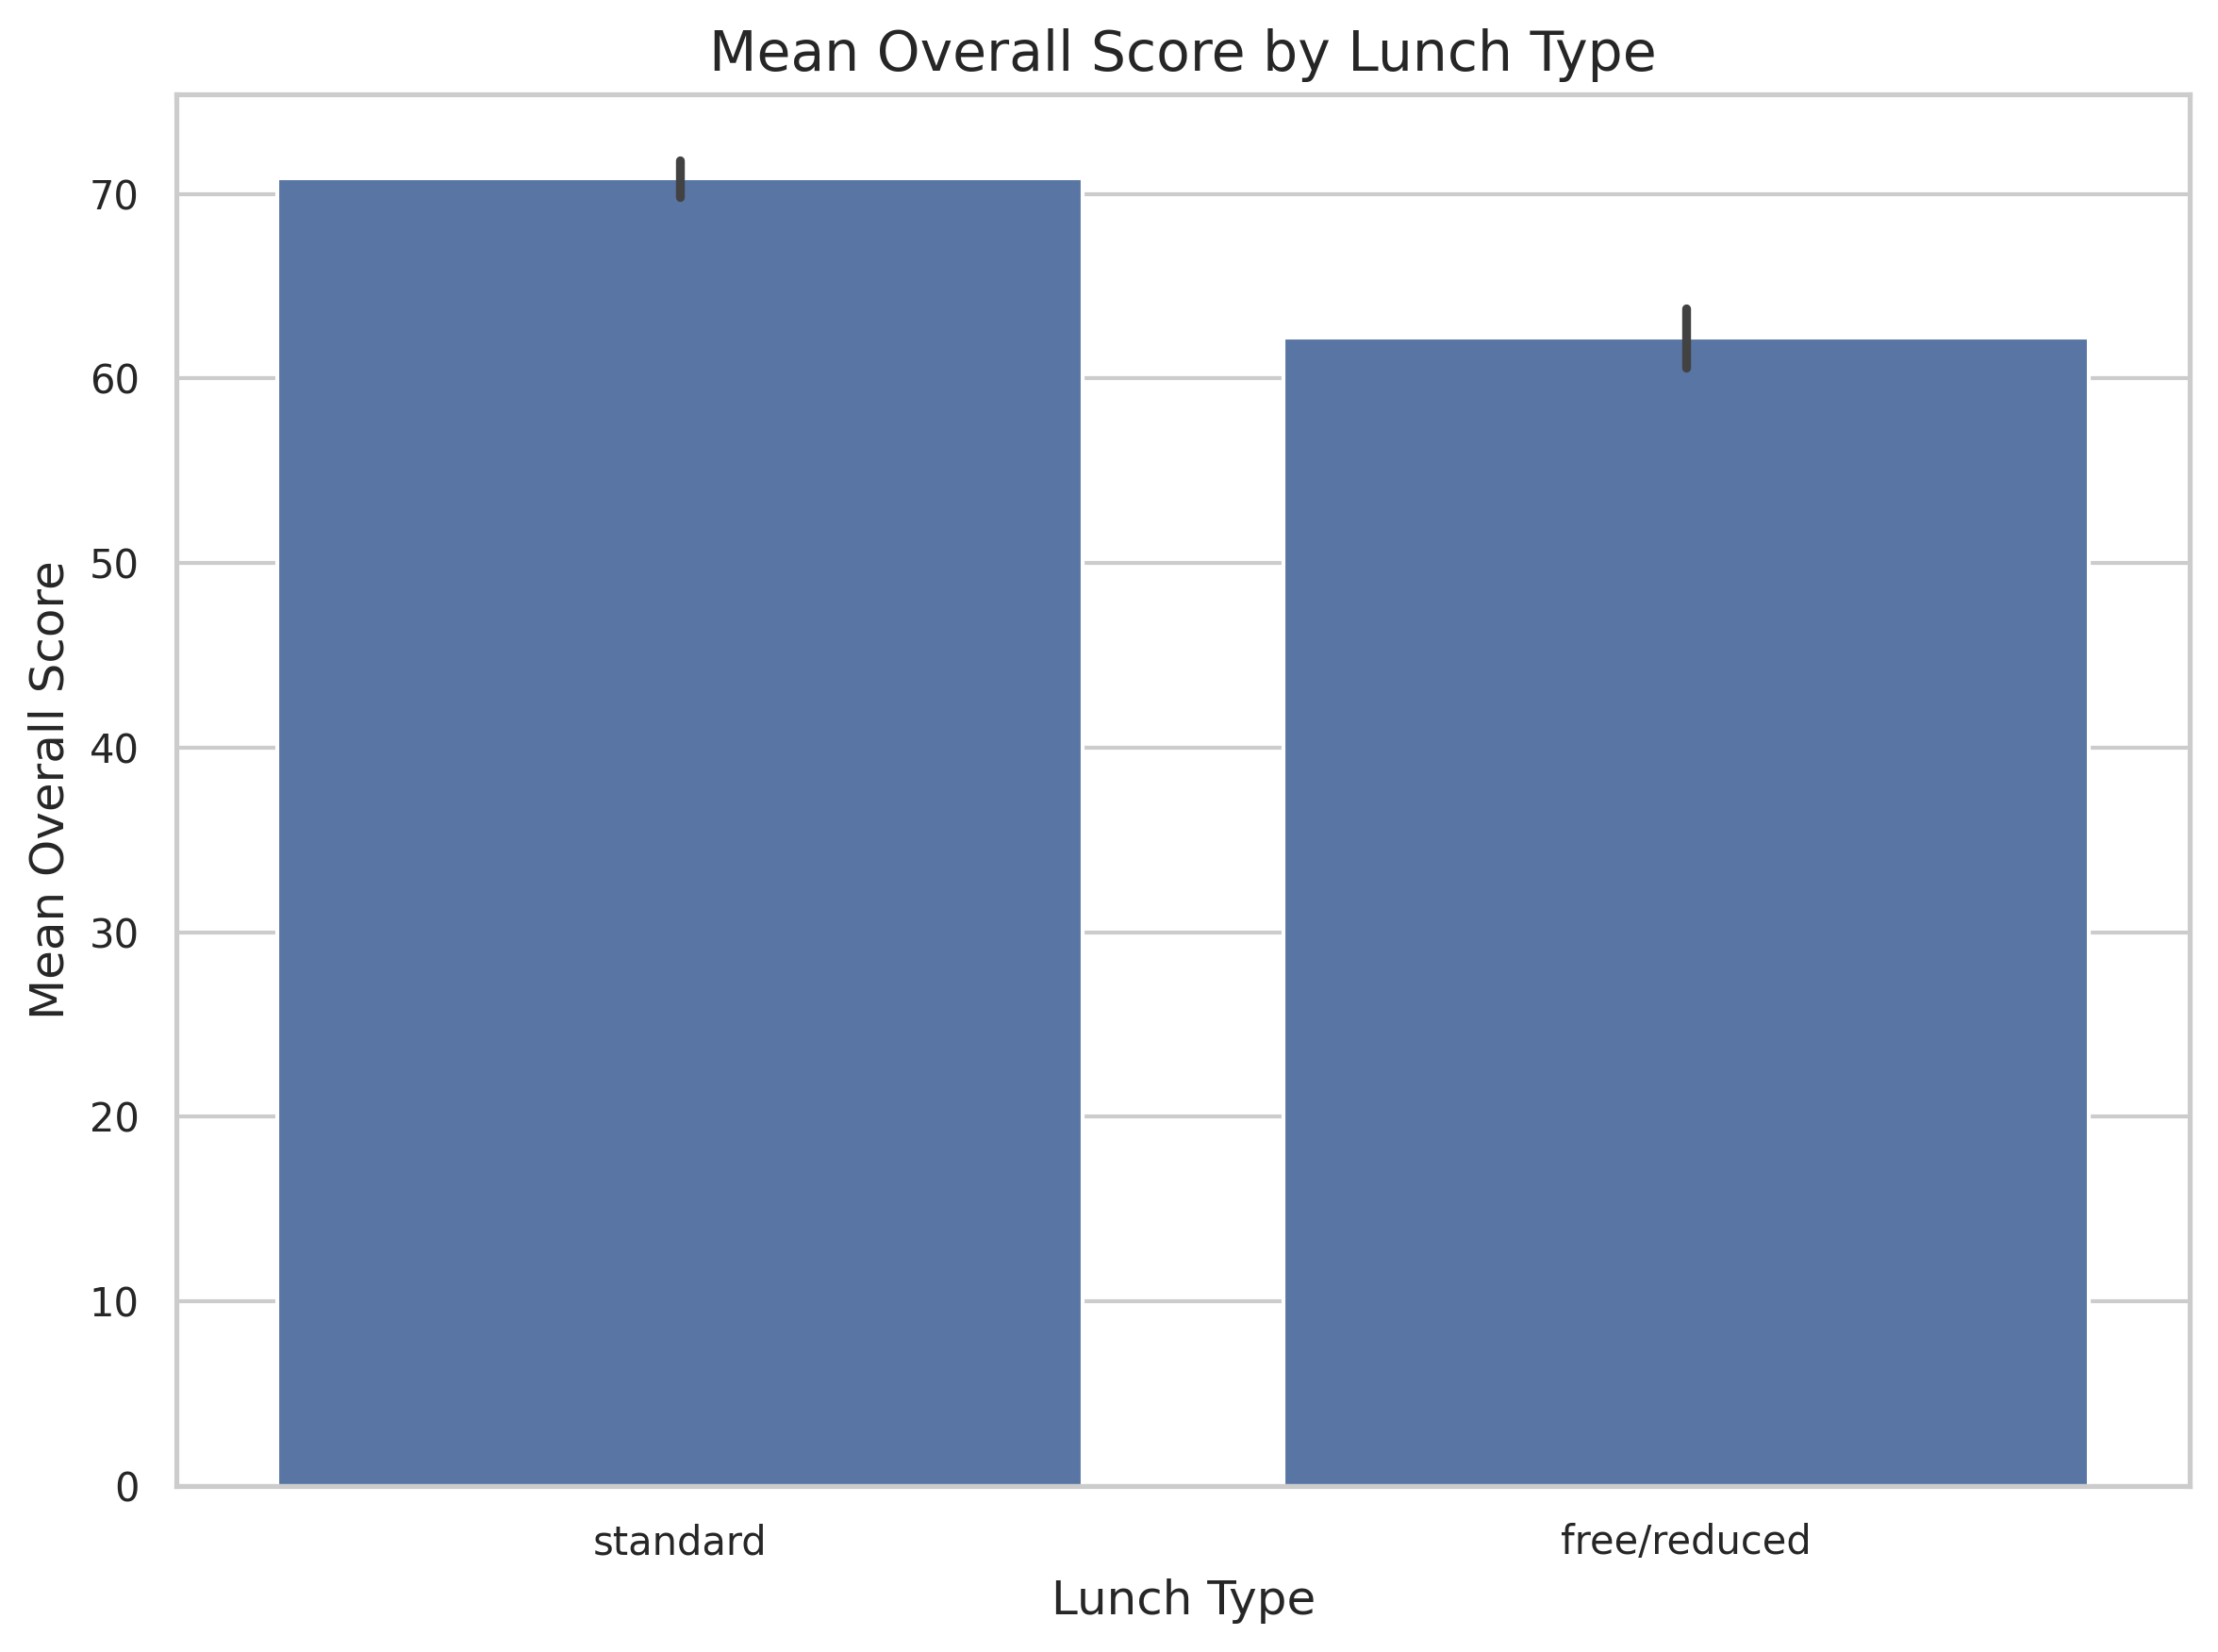

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.barplot(
    x=df_clean["lunch"].map({1: "standard", 0: "free/reduced"}),
    y=df_clean[["math score", "reading score", "writing score"]].mean(axis=1)
)

plt.title("Mean Overall Score by Lunch Type", fontsize=14)
plt.xlabel("Lunch Type", fontsize=12)
plt.ylabel("Mean Overall Score", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


5–8 sentence interpretation to reports

This graph shows the differences in mean scores for students based on lunch type, either standard or free/reduced. Overall, students with a standard lunch performed slightly better than those with a free or reduced lunch. Although both groups have mean scores between 60 and 75, the difference is noticeable. The spread of scores appears similar for both groups, indicating comparable variability. This suggests that while lunch type may have a small effect on performance, the impact is not very large.

Subject correlations

Question: How strongly do the three subjects move together?

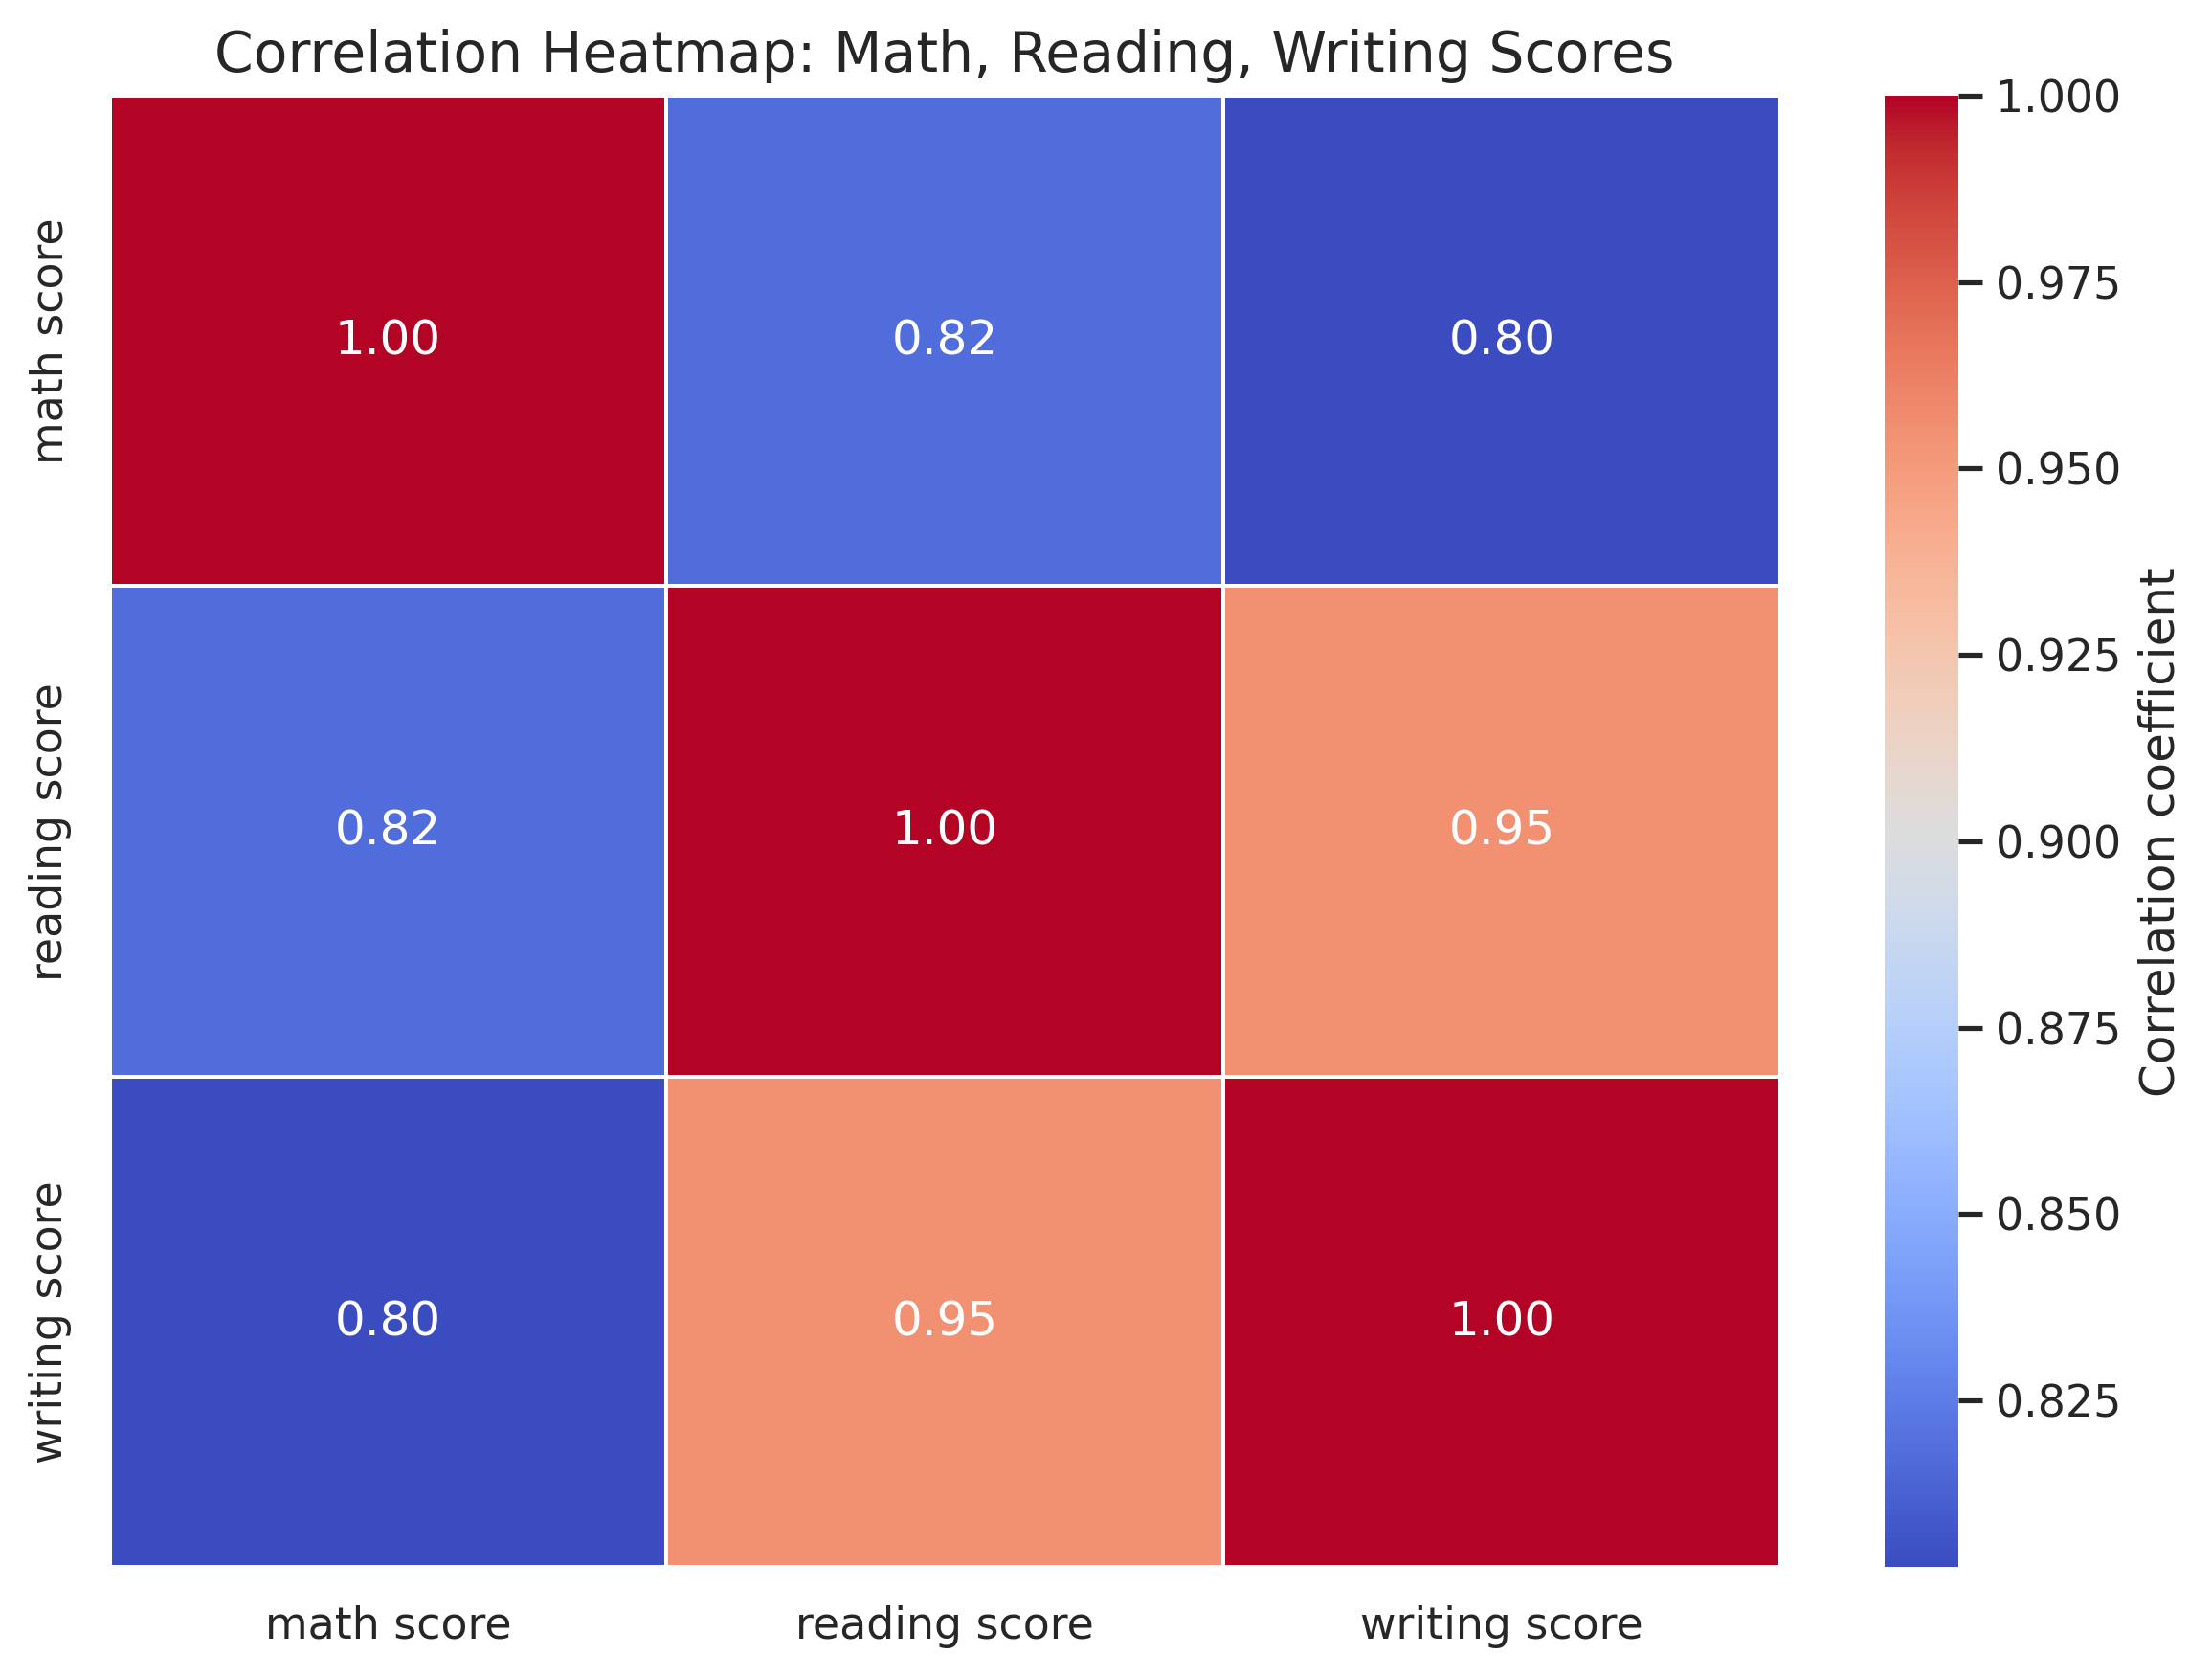

In [ ]:
scores = df_clean[["math score", "reading score", "writing score"]]

corr_matrix = scores.corr()

plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "Correlation coefficient"}
)

plt.title("Correlation Heatmap: Math, Reading, Writing Scores", fontsize=14)
plt.tight_layout()
plt.show()


5–8 sentence interpretation to reports

This heat map shows the correlations between Math, Reading, and Writing scores. Based on the data, Reading and Writing scores are more strongly correlated with each other than with Math. The difference between Reading and Writing is small, with a correlation of approximately 0.95. In contrast, the correlations between Math and the other two subjects are lower, around 0.80. This suggests that performance in Reading and Writing is closely related, whereas Math appears somewhat independent of the other subjects.

Math vs reading with trend lines by test prep

Question: How strongly are math and reading scores associated, and do students who
completed the test‑preparation course have a different slope in the math–reading
relationship than those who did not?

<Figure size 2400x1800 with 0 Axes>

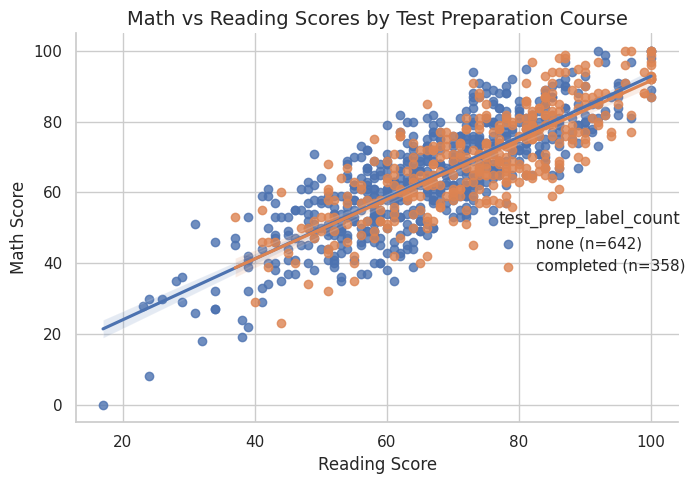

In [ ]:
df_plot = df_clean.copy()
df_plot["test_prep_label"] = df_plot["test_preparation_course"].map({1: "completed", 0: "none"})

group_counts = df_plot["test_prep_label"].value_counts()
df_plot["test_prep_label_count"] = df_plot["test_prep_label"].apply(lambda x: f"{x} (n={group_counts[x]})")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6), dpi=300)

sns.lmplot(
    x="reading score",
    y="math score",
    hue="test_prep_label_count",
    data=df_plot
)

plt.title("Math vs Reading Scores by Test Preparation Course", fontsize=14)
plt.xlabel("Reading Score", fontsize=12)
plt.ylabel("Math Score", fontsize=12)
plt.tight_layout()
plt.show()


5–8 sentence interpretation to reports

The scatter plot shows that Math and Reading scores have a positive relationship; as Math scores increase, Reading scores tend to increase as well. Students who completed the test preparation course generally perform better overall than those who did not. The group of students without test preparation shows more spread in their scores, indicating greater variability. In contrast, the completed test prep group’s scores are more tightly clustered around higher values. This suggests that completing the test preparation course is associated with both higher and more consistent performance in Math and Reading.